# Tracking Pigs using Mask R-CNN

For the homework assignment let's work on detecting pigs using Mask R-CNN in images. You can refer to readme file incase you wish to create your own class from scratch. But since annotating and training take up a lot of time, in this tutorial we shall stick to using the weights that I already trained. You can download them here (https://drive.google.com/drive/folders/19HU4b2VL__Ut19FsEweFIHDn2E-5MCys?usp=sharing).

I also suggest going through the project website first before going any further. 


Lets first begin with loading the dependencies (https://drive.google.com/drive/u/0/folders/19HU4b2VL__Ut19FsEweFIHDn2E-5MCys?usp=sharing). Apart from the libraries you will need Pig.py file. We will use it later to call functions. You will also need to download these images (https://drive.google.com/drive/folders/19HU4b2VL__Ut19FsEweFIHDn2E-5MCys?usp=sharing). 



In [64]:
import os
import sys
import random
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import Pig

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

print(f'ROOT_DIR {ROOT_DIR}')
print(f'tensorflow v{tf.__version__}')

ROOT_DIR /home/asya/Документы/GitHub/pig-weighing
tensorflow v2.12.0


### Set the path of the trained weights 

The link to trained weights file is given above. Make sure the directory of Pig.py and trained weights is same. Then update the path of weights below.

In [2]:
# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
Pig_WEIGHTS_PATH = ("model/mask_rcnn_coco.h5")  # TODO: update this path

### Load the configurations

In [3]:
config = Pig.PigConfig()
Pig_DIR = os.path.join(ROOT_DIR, "dataset/images") ## update the path where the images are downloaded from the link

In [4]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

### Notebook preferences 

In [5]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

### Load Validation Dataset 

I have already loaded the training and validation in the link above. You can use those to load your validation set here. You could modify the path accordingly

In [6]:
# Load validation dataset
dataset = Pig.PigDataset()
dataset.load_Pig(Pig_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 8
Classes: ['BG', 'Pig']


### Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

2023-06-28 16:09:36.770225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 16:09:36.770646: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Instructions for updating:
Use fn_output_signature instead


In [8]:
# Set path to Pig weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
weights_path = "model/mask_rcnn_pig_0030.h5"

# Or, load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  model/mask_rcnn_pig_0030.h5


### Run Detection

Now the system will randomly choose an image from the dataset to perform detection on it. 

image ID: Pig.ch02_201902261_88200.png (7) /home/asya/Документы/GitHub/pig-weighing/dataset/images/val/ch02_201902261_88200.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


2023-06-21 11:22:42.186237: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -51 } dim { size: 256 } dim { size: 256 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } int_val: 7 } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 4099 num_cores: 12 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 12582912 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { 

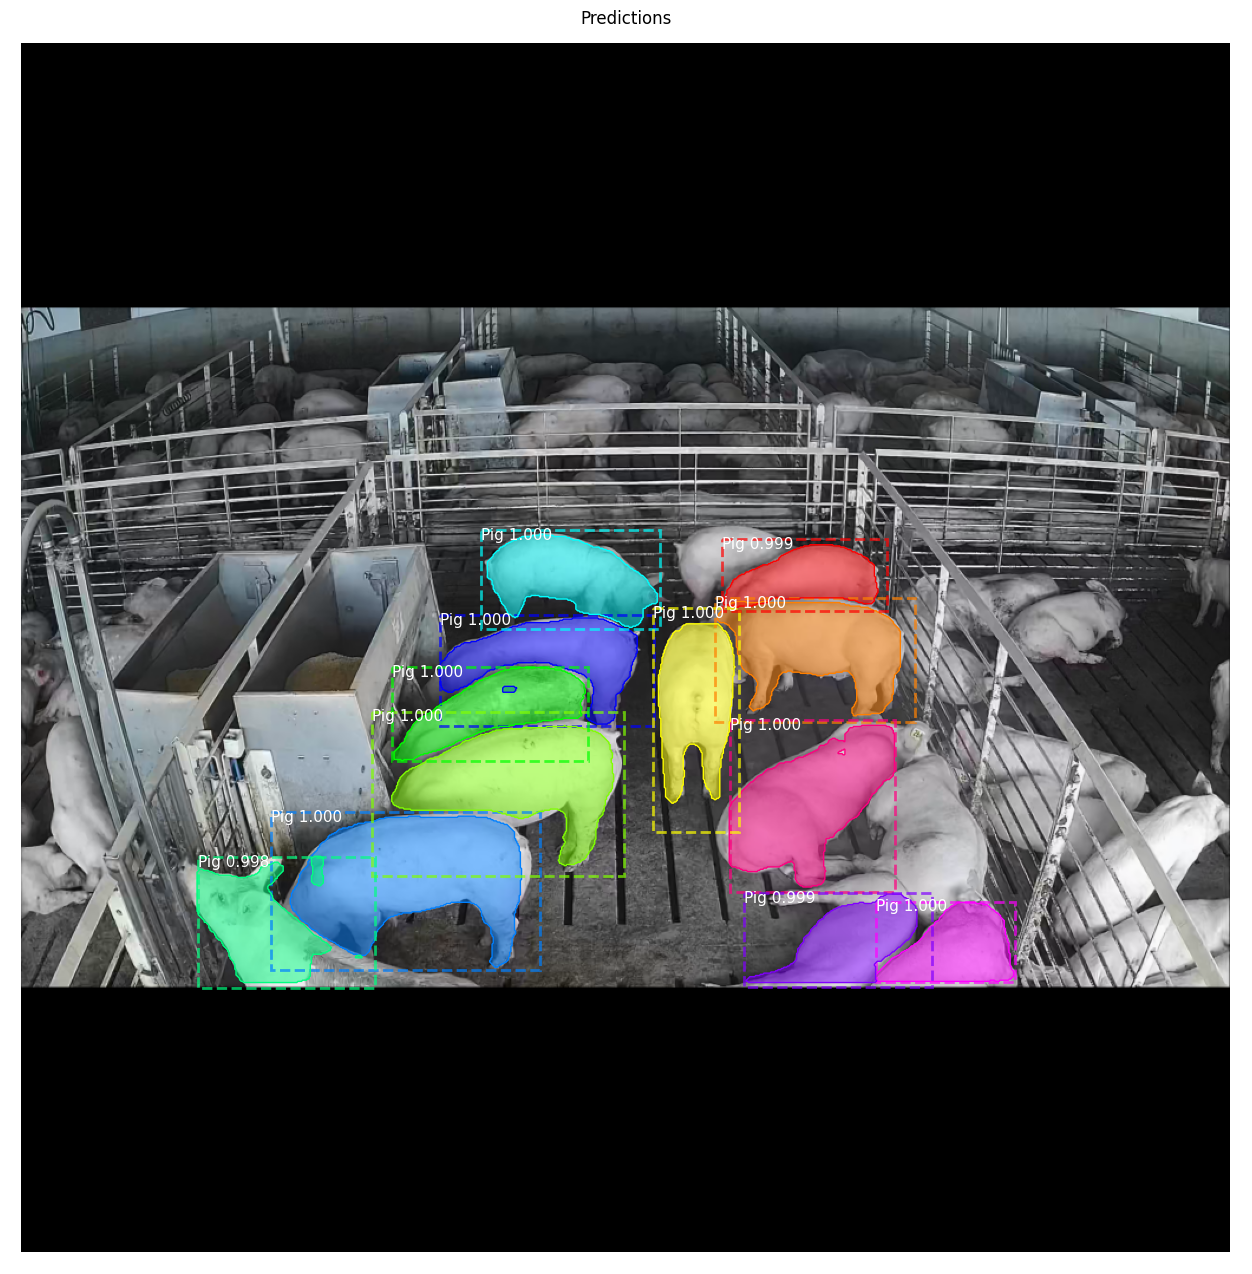

gt_class_id              shape: (14,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (14, 4)               min:  129.00000  max:  847.00000  int32
gt_mask                  shape: (1024, 1024, 14)      min:    0.00000  max:    1.00000  bool


In [9]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
# ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'],
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

At the end you should be able to get an image with bounding boxes, mask and accuracy labels. In case, you have any trouble, please do not hesitate to contact me at dhanda@iastate.edu 

In [58]:
# img = Image.open('3_A4_000059.png').convert('RGB')
img = Image.open('multipig1.jpeg').convert('RGB')
img_arr = np.array(img)
print(img_arr.shape)

(447, 800, 3)


Processing 1 images
image                    shape: (447, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


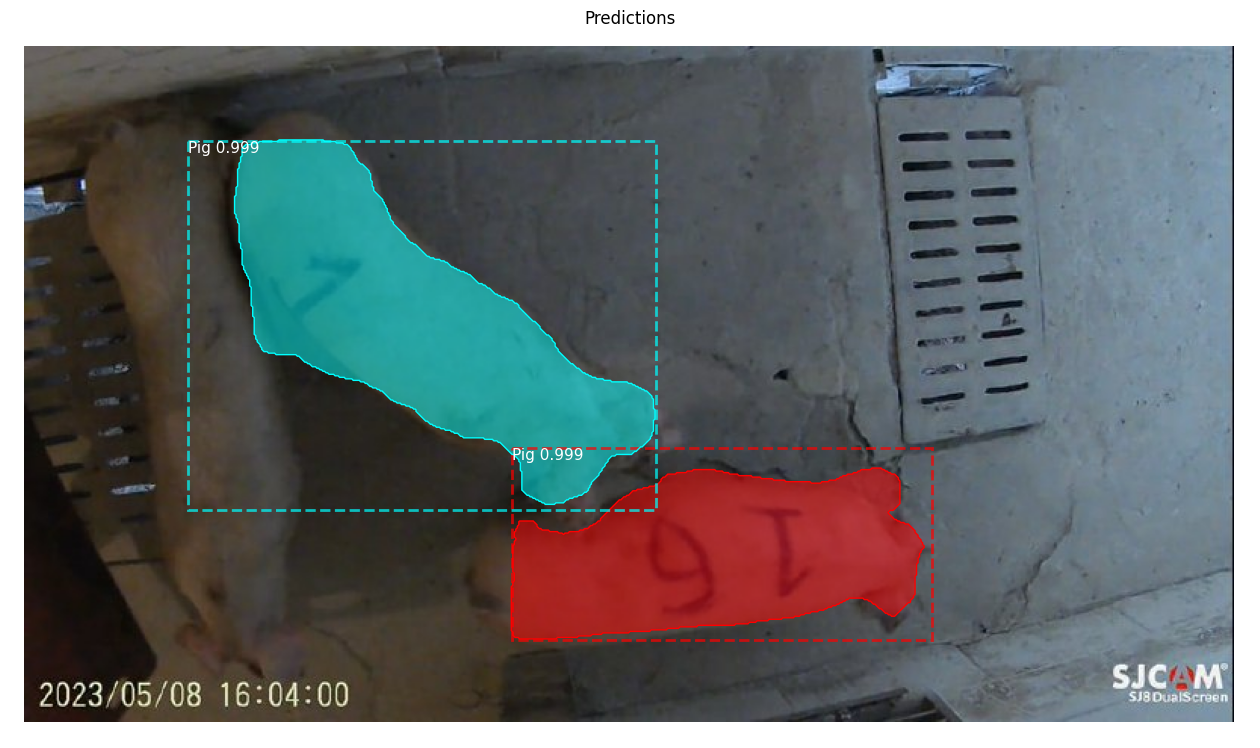

In [59]:
results = model.detect([img_arr], verbose=1)

# Display results
# ax = get_ax(1)
r = results[0]
visualize.display_instances(img_arr, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'],
                            title="Predictions")
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

In [54]:
print(f"Mask type {type(r['masks'])}, mask element type {type(r['masks'][0,0,0])}, mask shape {r['masks'].shape}, original frame shape {img_arr.shape}")

Mask type <class 'numpy.ndarray'>, mask element type <class 'numpy.bool_'>, mask shape (447, 800, 2), original frame shape (447, 800, 3)


In [60]:
# Save the mask
arr = r['masks'][:,:,:]
channel_3 = np.concatenate((arr[:, :, 0:1], arr[:, :, 1:2], arr[:, :, 0:1]), axis=2)
img = (channel_3.astype(np.uint8) * 255)
cv2.imwrite('mask_multipig1.png', img)

True

In [57]:
arr.shape

(447, 800, 2)

In [55]:
arr.shape

(564, 995, 3)